Dropdown(description='Select', options=(' ', 'GAN-Augmented', 'VAE-Augmented', 'Gaussian-Augmented', 'Flip-Aug…

Dropdown(description='Remove', options=(' ', 'Empirical', 'Reverse-Augmented'), value=' ')

Selected methods: Empirical, Reverse-Augmented


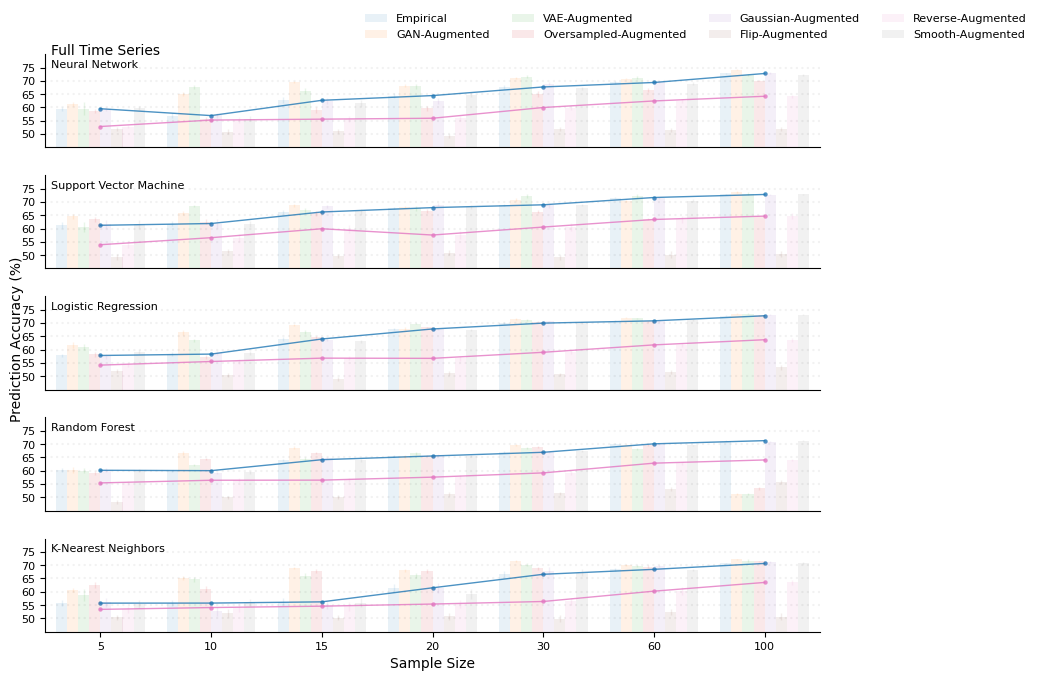

{'name': 'index', 'old': 0, 'new': 2, 'owner': Dropdown(description='Remove', options=(' ', 'Empirical', 'Reverse-Augmented'), value=' '), 'type': 'change'}
{'name': '_property_lock', 'old': {'index': 0}, 'new': {}, 'owner': Dropdown(description='Remove', options=(' ', 'Empirical', 'Reverse-Augmented'), value=' '), 'type': 'change'}


In [14]:
###############################################
## IMPORT MODULES                            ##
###############################################
from classification_plot_functions import *
import ipywidgets as wd
from IPython.display import clear_output


class InteractivePlot:

    def __init__(self):

        self.selected_targets = []
        self.available_targets, _ = retrieveData(0, 1)

        self.select_target = wd.Dropdown(options=[' ']+self.available_targets, value = ' ', description = 'Select', disabled = False)
        self.remove_target = wd.Dropdown(options=[' ']+self.selected_targets, value = ' ', description = 'Remove', disabled = False)

        self.select_target.observe(self.change_add)
        self.remove_target.observe(self.change_remove)
        self.refresh()

    def refresh(self):
        clear_output()
        display(self.select_target) #Display the widget for use
        display(self.remove_target) #Display the widget for use
        print(f"Selected methods: {', '.join(self.selected_targets)}")
        plot_main(self.selected_targets)

    def change_add(self, change):
        if change['type'] == 'change' and change['name'] == 'value' and self.select_target.value != ' ':
            self.selected_targets.append(self.select_target.value)
            self.available_targets.remove(self.select_target.value)
            self.select_target.options = [' ']+self.available_targets
            self.remove_target.options = [' ']+self.selected_targets
            self.refresh()

    def change_remove(self, change):
        print(change)
        if change['type'] == 'change' and change['name'] == 'value' and self.remove_target.value != ' ':
            self.selected_targets.remove(self.remove_target.value)
            self.available_targets.append(self.remove_target.value)
            self.select_target.options = [' ']+self.available_targets
            self.remove_target.options = [' ']+self.selected_targets
            self.refresh()

interactive_plot = InteractivePlot()

